# Data Storytelling

## Part 1: What are expert reviewers talking about?
What kind of information we can extract from coffee blogs? The following analysis was apply to one of the four blogs included in the project. We extracted TF-IDF feature vectors for the text to find meaningful pairs of terms for classifying them in categories and sections relatives to the complete experience in the coffee shop. Now, we want to discover which ones play a fundamental role in reviews.

(This is the continuation of Pre-processing notebook called *TF-IDF_blog.ipynb*)

Importing all relevant packages

In [363]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Reading data from **preprocessing** folder. We included categories and sections in *key_words.csv* to build *key_words_categorized.csv*, the file that it will be used in this stage. Both files can be founded in folder.

In [364]:
df = pd.read_csv('../Data_Story/preprocessing/key_words_categorized.csv')

There are a couple of None cells, according to the classify criteria. Firsly, we clean DataFrame, extracting None from *category* and *section* columns

In [365]:
df_filt= df[df['category']!='None']

In [366]:
df_filt= df[df['section']!='None']
df_filt.head()

,key_words,key_values,category,section
1,toast crave,0.71,food,baked
7,toast cravings,0.41,food,baked
8,best coffee,0.58,coffee,sentiment
11,best parklet,0.26,place,sentiment
14,find seat,0.26,place,stay


Grouping data under *category* and *section* columns:

In [367]:
df_count = df_filt.groupby(['category','section']).count()

Results are the following:

In [370]:
#df_count

### Category 1: Coffee
As we mentioned in the previuos notebook, sections for coffee are about the experience that involve the cup of coffee: types of drinks (including all varierity of coffee drinks, wine and tea), roasting information (own roasters, origin of roast, types of roast offered to customer), beans, baristas (expertise of baristas) and sentiment (how do you feel in front of this drink).

In [374]:
df1 = df_count.reset_index()
df_coffee = df1[df1['category'] == 'coffee'].sort_values('key_values')

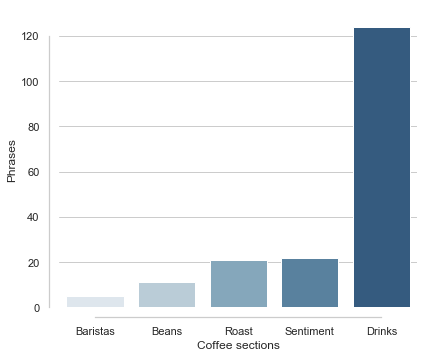

In [416]:
sns.set_style("whitegrid")
g = sns.catplot(x="section", y = 'key_values', data=df_coffee, saturation=.5,
                kind="bar", ci=None, aspect=1.2, palette='Blues')
g.set_axis_labels("Coffee sections", "Phrases").set_titles("{col_name} {col_var}").set_xticklabels(["Baristas", "Beans", "Roast", "Sentiment", "Drinks"]) 
sns.despine(offset=10, trim=True)



Total of key coffee phrases are:

In [380]:
total = df_coffee.groupby('category').sum()['key_values']

And each one section represents:

In [381]:
df_coffee['key_values'].apply(lambda n: n*100//total)

category,coffee
0,2
1,6
3,11
4,12
2,67


What kind of phrases we find here?

In [390]:
df_filt[(df_filt['category']=='coffee') & (df_filt['section']=='drinks')].head(20)

,key_words,key_values,category,section
47,cafe offers,0.29,coffee,drinks
48,known snowy,0.29,coffee,drinks
50,over ice,0.29,coffee,drinks
52,pellegrino espresso,0.29,coffee,drinks
53,plover cold,0.29,coffee,drinks
54,snowy plover,0.29,coffee,drinks
60,authentic soda,0.24,coffee,drinks
113,drinks featuring,0.28,coffee,drinks
114,espresso drinks,0.28,coffee,drinks
121,offers pour,0.28,coffee,drinks


Then, 67% of coffee phrases are relatives to types of drinks, follows for feelings and roast features. Baristas and Beans have the lower predominance.

### Category 2: Food
In this case, we extract a lot of terms as pastries, toasts, sweet baked items, light sandwiches, salads, breakfast, brunch, and lunch. Repeating the previuos exercise:

In [393]:
df_food = df1[df1['category'] == 'food'].sort_values('key_values')

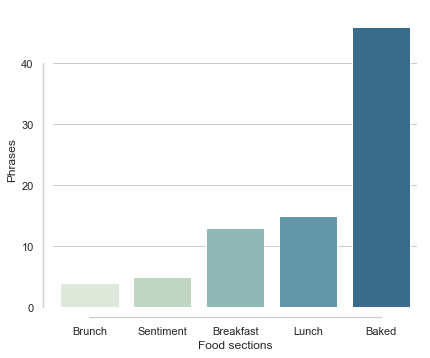

In [415]:
#sns.set_style("whitegrid")
g = sns.catplot(x="section", y = 'key_values', data=df_food, saturation=.5,
                kind="bar", ci=None, aspect=1.2, palette='GnBu')
g.set_axis_labels("Food sections", "Phrases").set_titles("{col_name} {col_var}").set_xticklabels(["Brunch", "Sentiment", "Breakfast", "Lunch", "Baked"]) 
sns.despine(offset=10, trim=True)

Total of key food phrases are:

In [397]:
total = df_food.groupby('category').sum()['key_values']

And each one section represents:

In [398]:
df_food['key_values'].apply(lambda n: n*100//total)

category,food
7,4
9,6
6,15
8,18
5,55


In the food phrases universe, *baked* items have the highest predominance (55%) and it makes sense, because the current trends of coffee shops put more prominence in drinks and then in food items, usually snacks and small elements. *Lunch* and *Breakfast* are the next priority with a predominance of 18% and 15%, respectively. 

What kind of phrases we find here?

In [399]:
df_filt[(df_filt['category']=='food') & (df_filt['section']=='baked')].head(20)

,key_words,key_values,category,section
1,toast crave,0.71,food,baked
7,toast cravings,0.41,food,baked
51,pastries free,0.29,food,baked
62,breads have,0.24,food,baked
200,donut special,0.41,food,baked
226,artisan breads,0.23,food,baked
228,batter bakery,0.23,food,baked
229,breads batter,0.23,food,baked
240,pastries firebrand,0.23,food,baked
241,plus pastries,0.23,food,baked


### Category 3: Place
We considering as place everything related to the physical space inside and outside of the coffee shop. Decoration in walls, musical elements and books are some examples of inside features. We discover some allusions to the features on the streets, sunsets, scenery beyond the coffee shop itself but possible thanks to the location of coffee. Aditionally, there are information about coffee dynamic (for here, to go), availability of wifi and size of the shop.

In [402]:
df_place = df1[df1['category'] == 'place'].sort_values('key_values')
df_place

,category,section,key_words,key_values
16,place,wifi,7,7
14,place,size,8,8
13,place,sentiment,10,10
11,place,go,11,11
15,place,stay,20,20
12,place,out,24,24
10,place,deco,36,36


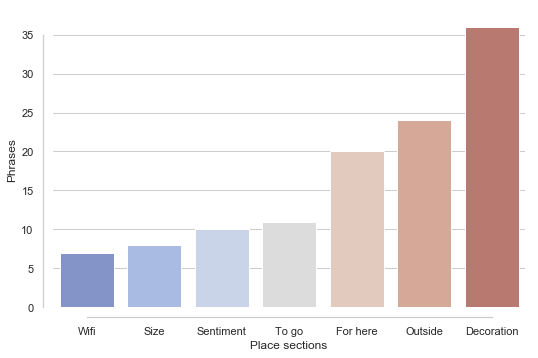

In [412]:
g = sns.catplot(x="section", y = 'key_values', data=df_place, saturation=.5,
                kind="bar", ci=None, aspect=1.5, palette='coolwarm')
g.set_axis_labels("Place sections", "Phrases").set_titles("{col_name} {col_var}").set_xticklabels(["Wifi", "Size", "Sentiment", "To go", "For here", "Outside", "Decoration"]) 
sns.despine(offset=10, trim=True)

Total of key food phrases are:

In [404]:
total = df_place.groupby('category').sum()['key_values']

And each one section represents:

In [405]:
df_place['key_values'].apply(lambda n: n*100//total)

category,place
16,6
14,6
13,8
11,9
15,17
12,20
10,31


*Decoration* has majority predominance with 31%, follows by features out of the coffee shop (21%). There is a special attention for parklets and what part of the city you could see from your seat in the coffee shop, for example. Aditionally, sections *For here* and *To go* as one big sections would be in the second predominance (26%). This last information is extremely important to choose a shop, because define a esential part of the type of experience that you will have.

What kind of phrases we find here?

In [406]:
df_filt[(df_filt['category']=='place') & (df_filt['section']=='deco')].head(20)

,key_words,key_values,category,section
76,area piano,0.22,place,deco
77,books patrons,0.22,place,deco
88,piano free,0.22,place,deco
92,shelves books,0.22,place,deco
217,most scenic,0.22,place,deco
221,scenic might,0.22,place,deco
259,communal table,0.32,place,deco
267,table inside,0.32,place,deco
268,array hearty,0.26,place,deco
308,technologically advanced,0.27,place,deco


To sum up, we discovered that types of drinks, roast features, baked food, decoration, outsides and dynamic of coffee shop are most predominance class of information in the blog analyzed.